In [1]:
import copy
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
#Steganographie texte dans une image

In [3]:
def carac2bin(c):
    valint=ord(c)
    valbin=bin(valint)[2:]
    valfinal=valbin.zfill(8)
    return valfinal

In [4]:
def bool2int(liste):
    liste=liste.astype(str)
    liste[liste == "True" ]="1"
    liste[liste == "False"]="0"
    valbin="".join(liste)
    return (int(valbin,2))

In [5]:
def decodeLigne(ligne):
    prem=ligne[:8, :]
    boolean=(prem[:, 1]+prem[:, 2])%2==1
    return bool2int(boolean)

In [6]:
def decode(image):
    taille=decodeLigne(image[0])
    message=""
    for i in range(1,taille+1):
        carac=chr(decodeLigne(image[i]))
        message=message+carac
    return message

In [7]:
def versBinaire(msg):
    liste = []
    taille=(bin(len(msg))[2:].zfill(8))
    liste.append(taille)
    for i in msg:
        liste.append(carac2bin(i))
    return liste

In [8]:
def dissimule(msg, image):
    im2=copy.copy(image)
    messagebin=versBinaire(msg)
    taillemessage=int(messagebin[0], 2)
    for i in range(taillemessage+1):
        for j in range(8):
            valbleu=im2[i] [j] [2]
            valvert=im2[i] [j] [1]
            if messagebin[i][j]=="0":
                if (valvert+valbleu)%2==1: 
                    if (valbleu%2==0):
                        im2[i] [j] [2]=valbleu+1
                    else:
                        im2[i] [j] [2]=valbleu-1
            else:
                if (valvert+valbleu)%2==0:
                    if (valbleu%2==0):
                        im2[i] [j] [2]=valbleu+1
                    else:
                        im2[i] [j] [2]=valbleu-1
    return im2

Insérer le message à cacher:


 Ceci est le message à cacher


Text(0.5, 1.0, 'Image modifiée')

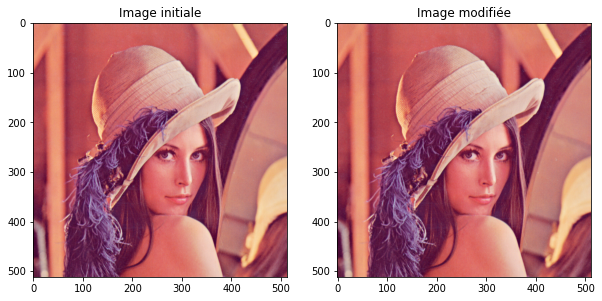

In [9]:
img2 = Image.open('lena.png')
im_ref2 = np.asarray(img2, dtype='int64')
print('Insérer le message à cacher:')
message=input()
imagemodifie=dissimule(message, im_ref2)
plt.figure(figsize=(10,20))
ax3=plt.subplot(121)
plt.imshow(im_ref2)
ax3.set_title('Image initiale')
ax4=plt.subplot(122)
plt.imshow(imagemodifie)
ax4.set_title('Image modifiée')

In [10]:
decode(imagemodifie)

'Ceci est le message à cacher'